In [37]:
# Récuperation de données
import pandas as pd

car_data = pd.read_csv('/home/hachem/Documents/git/data_artificial_inteligence/brief_projet/Programmer_votre_IA_pour_acheter_votre_voiture/carData.csv')

In [38]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [39]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [40]:
# Explorer les données
colonne = [ 'Selling_Price', 'Present_Price', 'Kms_Driven']
explore = car_data[colonne].describe()
explore

,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980
std,5.082812,8.644115,38886.883882
min,0.100000,0.320000,500.000000
25%,0.900000,1.200000,15000.000000
50%,3.600000,6.400000,32000.000000
75%,6.000000,9.900000,48767.000000
max,35.000000,92.600000,500000.000000


Text(0.5, 1.0, 'visualisation des donnés ')

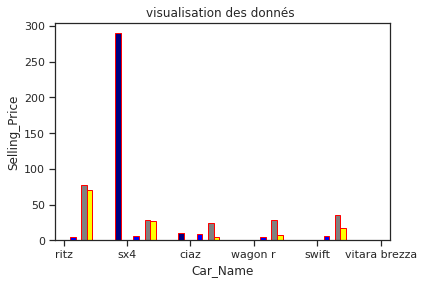

In [43]:
import matplotlib.pyplot as plt


plt.hist(car_data, range = (0, 5), bins = 5, color = ['blue', 'green', 'gray', 
                                                      'yellow', 'orange', 'purple', 'red', 
                                                      'brown', 'navy'],edgecolor = 'red')
plt.xlabel('Car_Name')
plt.ylabel('Selling_Price')
plt.title('visualisation des donnés ')

In [86]:
# chargement des données
from sqlalchemy import create_engine 
engine = create_engine("mysql+pymysql://root@localhost/voiture")

def chargement_db(link,table):
    print("Lecture des données")
    csize = 1000
    df = pd.read_csv(link,chunksize = csize, skiprows =0)
    i = csize
    for chunk in df:
        chunk.to_sql(table, con = engine, if_exists= 'append', index = False)
        i += csize
        print(i)
    return print("fin")

chargement_db('/home/hachem/Documents/git/data_artificial_inteligence/brief_projet/Programmer_votre_IA_pour_acheter_votre_voiture/carData.csv', 'vehicules')
    

Lecture des données
2000
fin


In [87]:
# Visualisation des données grâce à la librairie Seaborn

import seaborn as sns
engine = create_engine("mysql+pymysql://root@localhost/voiture")
Query = pd.read_sql_query("SELECT * FROM voiture.vehicules;", con = engine)
Query

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


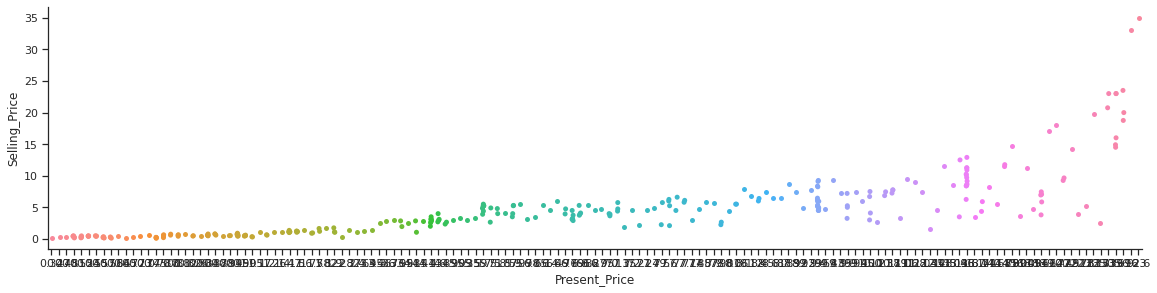

In [103]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Present_Price", y="Selling_Price", data=Query, height=4, aspect=4)

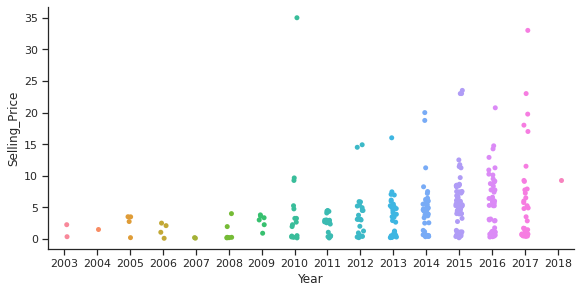

In [104]:
h = sns.catplot(x='Year', y='Selling_Price', data=Query, height=4, aspect=2)

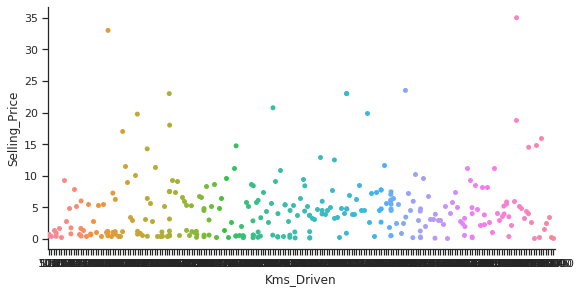

In [105]:
K = sns.catplot(x='Kms_Driven', y='Selling_Price', data= Query, height=4, aspect=2)

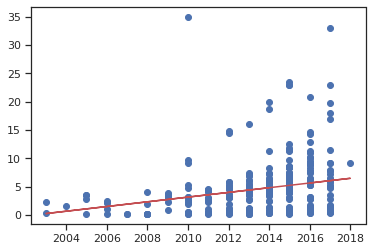

In [90]:
# Quantifier la relation entre l'âge et le prix de vente
# 1. Appliquer l’algorithme de régression linéaire univariée avec numpy
import numpy as np

query = pd.read_sql_query("SELECT  Year, Selling_Price, (2020 - Year) as Age FROM vehicules;", con = engine)
X= query['Year']
Y=query['Selling_Price']
fit = numpy.polyfit(X,Y , 1)
poly = numpy.poly1d(fit)
plt.scatter(X, Y)
plt.plot(X, poly(X), 'r')


slope: 0.415092    intercept: -831.178925


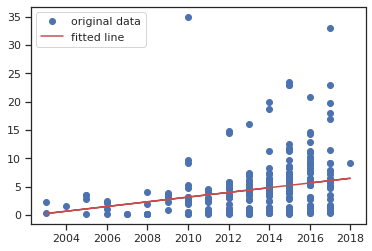

In [99]:
# 2. Appliquer l’algorithme de régression linéaire univariée avec scipy
from scipy import stats
x = query['Year']
y = query['Selling_Price']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope: %f    intercept: %f" % (slope, intercept))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [101]:
# 3. Appliquer l’algorithme de régression linéaire univariée avec sklearn
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_array([1., 2.])
